In [1]:
import numpy as np
import pandas as pd
import random
import glob

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures  

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
def dt_two_iterations_test_data(gas, data,features,output):
    dataframe = data
    X=dataframe[features]
    y=dataframe[output]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)
    print("total data: ",data.shape)
    print("train data: ", X_train.shape)
    print("test data: ",X_test.shape)
    scaler=StandardScaler()
    X_train_transformed=scaler.fit_transform(X_train)
    X_test_transformed=scaler.transform(X_test)
    
    # initiate the model instance
    #print("Initiating Decision Tree Instance")
    dt=DecisionTreeRegressor(random_state=10)
    rf = RandomForestRegressor(n_estimators=10, random_state=10)

    # create default model
    dt=DecisionTreeRegressor(random_state=10)
    dt.fit(X_train_transformed,y_train)
    treedepth=dt.tree_.max_depth
    #print("Default Tree Depth: ",treedepth)

    # optimize the model based on default tree path
    grid_param= {'max_depth':list(np.arange(treedepth-10,treedepth+10))}
    clf = GridSearchCV(rf, grid_param,cv=5,scoring='neg_mean_absolute_error')
    clf.fit(X_train_transformed,y_train)
    #print("Optimized Tree Depth: ",clf.best_params_["max_depth"])

    # run decision tree on optimized model 
    dt=DecisionTreeRegressor(max_depth=clf.best_params_["max_depth"],random_state=10)
    dt.fit(X_train_transformed,y_train)
    ytrain_pred_dt_itr1 = dt.predict(X_train_transformed)
    ytest_pred_dt_itr1 = dt.predict(X_test_transformed)

    plt.plot(y_test,y_test,"r")
    plt.scatter(x=y_test,y=ytest_pred_dt_itr1)
    imgfile = gas +'.png'
    print(imgfile)
    plt.savefig(imgfile)

total data:  (1394, 7)
train data:  (1254, 5)
test data:  (140, 5)
predicted_test_data.png


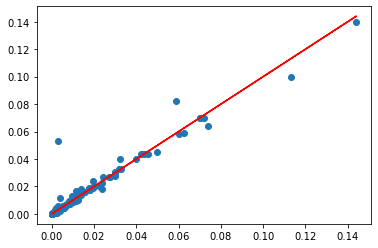

In [4]:
data = df
features = ['T(K)','P(bar)','Pc','Tc','omega']
output = ['x1']
dt_two_iterations_test_data("predicted_test_data", data, features, output)

In [6]:
def dt_two_iterations_train_data(gas, data,features,output):
    dataframe = data
    X=dataframe[features]
    y=dataframe[output]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)
    print("total data: ",data.shape)
    print("train data: ", X_train.shape)
    print("test data: ",X_test.shape)
    scaler=StandardScaler()
    X_train_transformed=scaler.fit_transform(X_train)
    X_test_transformed=scaler.transform(X_test)
    
    # initiate the model instance
    #print("Initiating Decision Tree Instance")
    dt=DecisionTreeRegressor(random_state=10)
    rf = RandomForestRegressor(n_estimators=10, random_state=10)

    # create default model
    dt=DecisionTreeRegressor(random_state=10)
    dt.fit(X_train_transformed,y_train)
    treedepth=dt.tree_.max_depth
    #print("Default Tree Depth: ",treedepth)

    # optimize the model based on default tree path
    grid_param= {'max_depth':list(np.arange(treedepth-10,treedepth+10))}
    clf = GridSearchCV(rf, grid_param,cv=5,scoring='neg_mean_absolute_error')
    clf.fit(X_train_transformed,y_train)
    #print("Optimized Tree Depth: ",clf.best_params_["max_depth"])

    # run decision tree on optimized model 
    dt=DecisionTreeRegressor(max_depth=clf.best_params_["max_depth"],random_state=10)
    dt.fit(X_train_transformed,y_train)
    ytrain_pred_dt_itr1 = dt.predict(X_train_transformed)
    ytest_pred_dt_itr1 = dt.predict(X_test_transformed)
    
    dt_imp=dt.feature_importances_.tolist()
    dt_tup=(features,dt_imp)
    print("feature imp")
    print(dt_tup)

    plt.plot(y_train,y_train,"r")
    plt.scatter(x=y_train,y=ytrain_pred_dt_itr1)
    imgfile = gas +'.png'
    print(imgfile)
    plt.savefig(imgfile)

total data:  (1394, 7)
train data:  (1254, 5)
test data:  (140, 5)
feature imp
(['T(K)', 'P(bar)', 'Pc', 'Tc', 'omega'], [0.3450262378233348, 0.363687724239641, 0.13241907949218262, 0.018679143375517744, 0.14018781506932387])
predicted_train_data.png


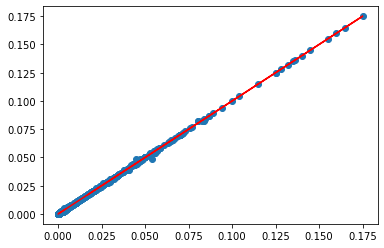

In [7]:
data = df
features = ['T(K)','P(bar)','Pc','Tc','omega']
output = ['x1']
dt_two_iterations_train_data("predicted_train_data", data, features, output)

In [ ]:
def dt_generate_predicted_dataframe(gas, data,features,output):
    dataframe = data
    X=dataframe[features]
    y=dataframe[output]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)
    print("total data: ",data.shape)
    print("train data: ", X_train.shape)
    print("test data: ",X_test.shape)
    scaler=StandardScaler()
    X_train_transformed=scaler.fit_transform(X_train)
    X_test_transformed=scaler.transform(X_test)
    
    # initiate the model instance
    #print("Initiating Decision Tree Instance")
    dt=DecisionTreeRegressor(random_state=10)
    rf = RandomForestRegressor(n_estimators=10, random_state=10)

    # create default model
    dt=DecisionTreeRegressor(random_state=10)
    dt.fit(X_train_transformed,y_train)
    treedepth=dt.tree_.max_depth
    #print("Default Tree Depth: ",treedepth)

    # optimize the model based on default tree path
    grid_param= {'max_depth':list(np.arange(treedepth-10,treedepth+10))}
    clf = GridSearchCV(rf, grid_param,cv=5,scoring='neg_mean_absolute_error')
    clf.fit(X_train_transformed,y_train)
    #print("Optimized Tree Depth: ",clf.best_params_["max_depth"])

    # run decision tree on optimized model 
    dt=DecisionTreeRegressor(max_depth=clf.best_params_["max_depth"],random_state=10)
    dt.fit(X_train_transformed,y_train)
    ytrain_pred_dt_itr1 = dt.predict(X_train_transformed)
    ytest_pred_dt_itr1 = dt.predict(X_test_transformed)

    # generate train data: 
    #print([each[0] for each in y_train.values])
    #print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
    #print(ytrain_pred_dt_itr1)
    temp_df_train = pd.DataFrame()
    temp_df_train['y_train_actual'] = [each[0] for each in y_train.values]
    temp_df_train['y_train_pred'] = ytrain_pred_dt_itr1
    
    temp_df_test = pd.DataFrame()
    temp_df_test['y_test_actual'] = [each[0] for each in y_test.values]
    temp_df_test['y_test_pred'] = ytest_pred_dt_itr1
    
    temp_df_train.to_csv("train_result.csv")
    temp_df_test.to_csv("test_result.csv")
    print("end")

data = df
features = ['T(K)','P(bar)','Pc','Tc','omega']
output = ['x1']
dt_generate_predicted_dataframe("predicted_train_data", data, features, output)